In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import sys
sys.path.append('..')
from utils.read_utils import load_dataset, load_indicators3, load_horizons

In [2]:
# Import the dataset
X_train, X_test, y_train, y_test = load_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79002, 27), (19800, 27), (79002, 3), (19800, 3))

In [3]:
X_train.head()

,Symbol,Sector,Close,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MFI_14,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,industry_macds_12_26,sp500_future_macd_12_252,sp500_future_macdh_12_252,sp500_future_macds_12_252,dollar_index_macd_12_252,dollar_index_macdh_12_252,dollar_index_macds_12_252,constant_maturity_macd_12_26,constant_maturity_macdh_12_26,constant_maturity_macds_12_26
2018-01-12,AAPL,Information Technology,44.272499,0.279049,0.070511,0.208537,49.448601,86.786413,79.241559,63.933113,...,10.904313,258.996478,17.345854,241.650624,-3.884604,-0.285202,-3.599402,-0.013031,0.008353,-0.021384
2018-01-16,AAPL,Information Technology,44.047501,0.299277,0.072592,0.226685,56.387717,84.778499,83.724224,60.286756,...,11.585355,272.713460,17.166527,255.546933,-4.130166,-0.378979,-3.751187,-0.015600,0.003290,-0.018891
2018-01-17,AAPL,Information Technology,44.775002,0.369749,0.114451,0.255298,66.314712,87.455489,86.340133,66.866883,...,12.413647,277.316124,17.415353,259.900771,-4.286488,-0.428241,-3.858247,-0.016080,0.002249,-0.018328
2018-01-18,AAPL,Information Technology,44.814999,0.423939,0.134913,0.289026,73.389883,85.987594,86.073860,67.188769,...,13.294427,279.748077,15.877844,263.870232,-4.427213,-0.455173,-3.972040,-0.012283,0.004836,-0.017119
2018-01-19,AAPL,Information Technology,44.615002,0.445611,0.125267,0.320343,65.569700,91.451444,88.298176,63.848590,...,14.161947,283.602023,15.785433,267.816591,-4.534870,-0.450263,-4.084606,-0.008371,0.006999,-0.015370


In [4]:
y_train.head()

,Symbol,Sector,Close_after_1_day
2018-01-12,AAPL,Information Technology,44.047501
2018-01-16,AAPL,Information Technology,44.775002
2018-01-17,AAPL,Information Technology,44.814999
2018-01-18,AAPL,Information Technology,44.615002
2018-01-19,AAPL,Information Technology,44.250000


In [5]:
# Import indicators and horizons
technical_indicators, fundamental_indicators, combined_indicators = load_indicators3()
horizons, horizons_7 = load_horizons()
len(technical_indicators), len(fundamental_indicators), len(combined_indicators)

(10, 16, 25)

# For one company

In [6]:
X_train_one = X_train.loc[X_train['Symbol'] == "AAPL"].copy()
X_test_one = X_test.loc[X_test['Symbol'] == "AAPL"].copy()
y_train_one = y_train.loc[y_train['Symbol'] == "AAPL"].copy()
y_test_one = y_test.loc[y_test['Symbol'] == "AAPL"].copy()
X_train_one.shape, X_test_one.shape, y_train_one.shape, y_test_one.shape

((798, 27), (200, 27), (798, 3), (200, 3))

In [7]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train_one[combined_indicators], y_train_one[horizons].values.ravel().astype(int))
results = forest.feature_importances_

RandomForestRegressor(n_jobs=-1, random_state=0)

In [8]:
results = forest.feature_importances_
features = ['MACD', 'MFI', 'FastK', 'FastD', 'RSI', 'AD', 'ROC', 
                 'Industry_MACD_12_252', 'Industry_MACD_12_26', 'SP500_Future_MACD', 'FX_USD_MACD', 'Treasury10_2_MACD']
technical_features = ['MACD', 'MFI', 'FastK', 'FastD', 'RSI', 'AD', 'ROC']
fundamental_features = ['Industry_MACD_12_252', 'Industry_MACD_12_26', 'SP500_Future_MACD', 'FX_USD_MACD', 'Treasury10_2_MACD']
# Use average value to represent the same indicators
values = []
values.append((results[1]+ results[2]+ results[3])/3)   #MACD
values.append(results[4])    #MFI
values.append(results[5])    #FastK
values.append(results[6])    #FastD
values.append(results[7])    #RSI
values.append(results[8])    #AD
values.append(results[9])    #ROC
values.append((results[10]+ results[11]+ results[12])/3)    #Industry_MACD_12_252
values.append((results[13]+ results[14]+ results[15])/3)    #Industry_MACD_12_26
values.append((results[16]+ results[17]+ results[18])/3)    #SP500_Future_MACD
values.append((results[19]+ results[20]+ results[21])/3)    #FX_USD_MACD
values.append((results[22]+ results[23]+ results[24])/3)    #Treasury10_2_MACD
importances = pd.DataFrame(values, index=features, columns=['Importance'])
importances = importances.sort_values('Importance', ascending=False)
importances

,Importance
AD,0.089872
FX_USD_MACD,0.003351
SP500_Future_MACD,0.002420
Industry_MACD_12_26,0.000636
Treasury10_2_MACD,0.000265
Industry_MACD_12_252,0.000241
ROC,0.000190
MACD,0.000141
MFI,0.000134
RSI,0.000110


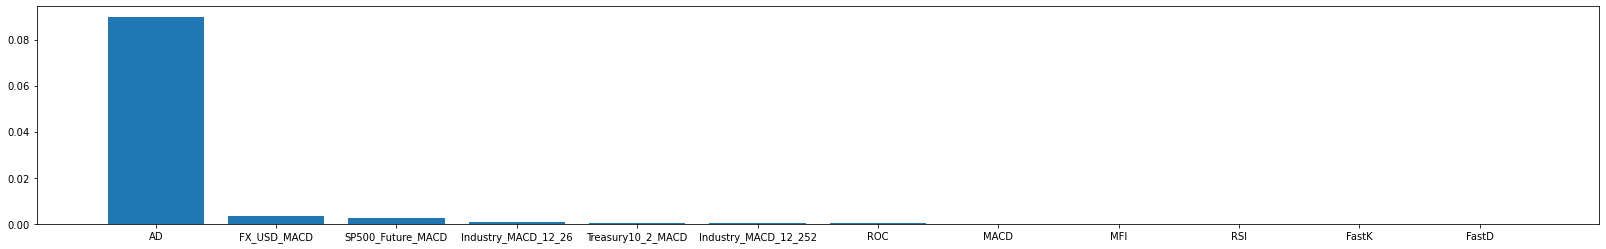

In [9]:
plt.figure(figsize=(28,4))
plt.bar(importances.index, importances['Importance'])
plt.show()

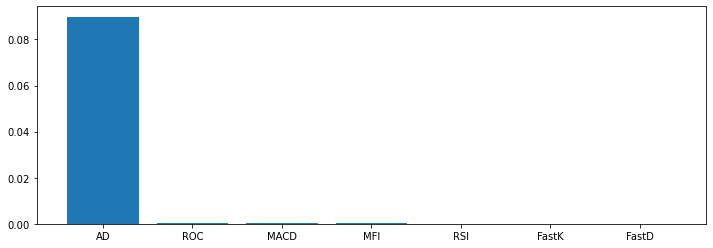

In [10]:
technical_importances = importances.loc[technical_features]
technical_importances = technical_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(12,4))
plt.bar(technical_importances.index, technical_importances['Importance'])
plt.show()

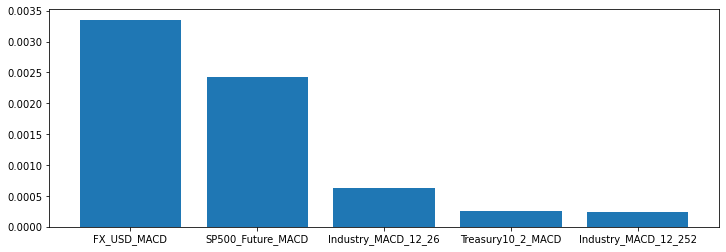

In [11]:
fundamental_importances = importances.loc[fundamental_features]
fundamental_importances = fundamental_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(12,4))
plt.bar(fundamental_importances.index, fundamental_importances['Importance'])
plt.show()

In [12]:
X = pd.DataFrame(columns=features)
X['Close'] = X_train_one['Close']
X['MACD'] = (X_train_one['MACD_12_26_9'] +  X_train_one['MACDh_12_26_9'] +  X_train_one['MACDs_12_26_9'])/3
X['MFI'] = X_train_one['MFI_14']
X['FastK'] = X_train_one['STOCHk_14_3_3']
X['FastD'] = X_train_one['STOCHd_14_3_3']
X['RSI'] = X_train_one['RSI_14']
X['AD'] = X_train_one['AD']
X['ROC'] = X_train_one['ROC_126']
X['Industry_MACD_12_252'] = (X_train_one['industry_macd_12_252'] +  X_train_one['industry_macdh_12_252'] +  X_train_one['industry_macds_12_252'])/3
X['Industry_MACD_12_26'] = (X_train_one['industry_macd_12_26'] +  X_train_one['industry_macdh_12_26'] +  X_train_one['industry_macds_12_26'])/3
X['SP500_Future_MACD'] = (X_train_one['sp500_future_macd_12_252'] +  X_train_one['sp500_future_macdh_12_252'] +  X_train_one['sp500_future_macds_12_252'])/3
X['FX_USD_MACD'] = (X_train_one['dollar_index_macd_12_252'] +  X_train_one['dollar_index_macdh_12_252'] +  X_train_one['dollar_index_macds_12_252'])/3
X['Treasury10_2_MACD'] = (X_train_one['constant_maturity_macd_12_26'] +  X_train_one['constant_maturity_macdh_12_26'] +  X_train_one['constant_maturity_macds_12_26'])/3
X.head()

,MACD,MFI,FastK,FastD,RSI,AD,ROC,Industry_MACD_12_252,Industry_MACD_12_26,SP500_Future_MACD,FX_USD_MACD,Treasury10_2_MACD,Close
2018-01-12,0.186032,49.448601,86.786413,79.241559,63.933113,3.632714e+09,18.820454,105.772870,9.437120,172.664318,-2.589736,-0.008687,44.272499
2018-01-16,0.199518,56.387717,84.778499,83.724224,60.286756,3.518090e+09,17.805567,106.403244,9.539683,181.808973,-2.753444,-0.010400,44.047501
2018-01-17,0.246499,66.314712,87.455489,86.340133,66.866883,3.645766e+09,19.336357,108.583496,10.484543,184.877416,-2.857659,-0.010720,44.775002
2018-01-18,0.282626,73.389883,85.987594,86.073860,67.188769,3.657230e+09,18.699503,110.476272,11.211699,186.498718,-2.951476,-0.008189,44.814999
2018-01-19,0.297074,65.569700,91.451444,88.298176,63.848590,3.653047e+09,18.704278,112.115692,11.754684,189.068015,-3.023246,-0.005581,44.615002


<AxesSubplot:>

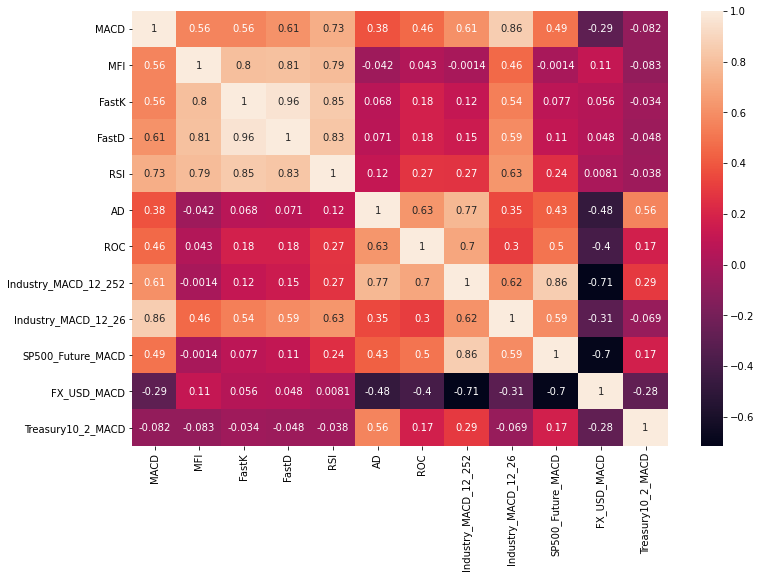

In [13]:
features = ['MACD', 'MFI', 'FastK', 'FastD', 'RSI', 'AD', 'ROC', 
                 'Industry_MACD_12_252', 'Industry_MACD_12_26', 'SP500_Future_MACD', 'FX_USD_MACD', 'Treasury10_2_MACD']
plt.figure(figsize=(12,8))
sns.heatmap(X[features].corr(), annot=True)

# For all conpanies

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train[combined_indicators], y_train[horizons].values.ravel().astype(int))

RandomForestRegressor(n_jobs=-1, random_state=0)

In [15]:
results = forest.feature_importances_
features = ['MACD', 'MFI', 'FastK', 'FastD', 'RSI', 'AD', 'ROC', 
                 'Industry_MACD_12_252', 'Industry_MACD_12_26', 'SP500_Future_MACD', 'FX_USD_MACD', 'Treasury10_2_MACD']
values = []
values.append((results[1]+ results[2]+ results[3])/3)   #MACD
values.append(results[4])    #MFI
values.append(results[5])    #FastK
values.append(results[6])    #FastD
values.append(results[7])    #RSI
values.append(results[8])    #AD
values.append(results[9])    #ROC
values.append((results[10]+ results[11]+ results[12])/3)    #Industry_MACD_12_252
values.append((results[13]+ results[14]+ results[15])/3)    #Industry_MACD_12_26
values.append((results[16]+ results[17]+ results[18])/3)    #SP500_Future_MACD
values.append((results[19]+ results[20]+ results[21])/3)    #FX_USD_MACD
values.append((results[22]+ results[23]+ results[24])/3)    #Treasury10_2_MACD
importances = pd.DataFrame(values, index=features, columns=['Importance'])
importances = importances.sort_values('Importance', ascending=False)
importances

,Importance
Industry_MACD_12_252,0.000106
AD,0.000034
ROC,0.000029
FX_USD_MACD,0.000025
Treasury10_2_MACD,0.000024
MACD,0.000023
MFI,0.000021
FastK,0.000021
RSI,0.000021
Industry_MACD_12_26,0.000020


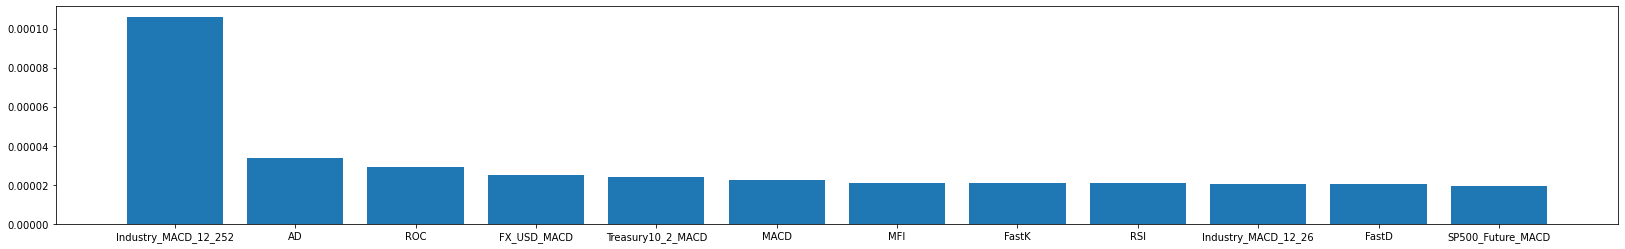

In [16]:
plt.figure(figsize=(28,4))
plt.bar(importances.index, importances['Importance'])
plt.show()

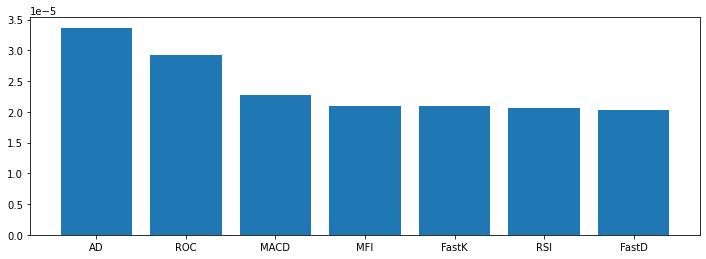

In [17]:
technical_importances = importances.loc[technical_features]
technical_importances = technical_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(12,4))
plt.bar(technical_importances.index, technical_importances['Importance'])
plt.show()

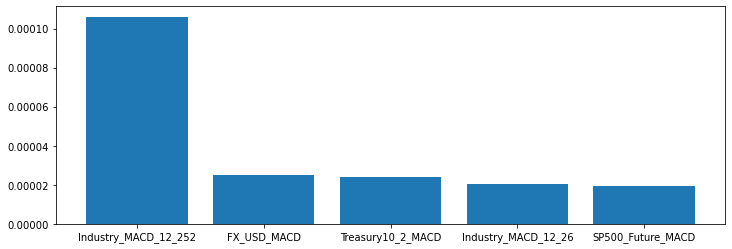

In [18]:
fundamental_importances = importances.loc[fundamental_features]
fundamental_importances = fundamental_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(12,4))
plt.bar(fundamental_importances.index, fundamental_importances['Importance'])
plt.show()

In [19]:
X = pd.DataFrame(columns=features)
X['Close'] = X_train['Close']
X['MACD'] = (X_train['MACD_12_26_9'] +  X_train['MACDh_12_26_9'] +  X_train['MACDs_12_26_9'])/3
X['MFI'] = X_train['MFI_14']
X['FastK'] = X_train['STOCHk_14_3_3']
X['FastD'] = X_train['STOCHd_14_3_3']
X['RSI'] = X_train['RSI_14']
X['AD'] = X_train['AD']
X['ROC'] = X_train['ROC_126']
X['Industry_MACD_12_252'] = (X_train['industry_macd_12_252'] +  X_train['industry_macdh_12_252'] +  X_train['industry_macds_12_252'])/3
X['Industry_MACD_12_26'] = (X_train['industry_macd_12_26'] +  X_train['industry_macdh_12_26'] +  X_train['industry_macds_12_26'])/3
X['SP500_Future_MACD'] = (X_train['sp500_future_macd_12_252'] +  X_train['sp500_future_macdh_12_252'] +  X_train['sp500_future_macds_12_252'])/3
X['FX_USD_MACD'] = (X_train['dollar_index_macd_12_252'] +  X_train['dollar_index_macdh_12_252'] +  X_train['dollar_index_macds_12_252'])/3
X['Treasury10_2_MACD'] = (X_train['constant_maturity_macd_12_26'] +  X_train['constant_maturity_macdh_12_26'] +  X_train['constant_maturity_macds_12_26'])/3
X.head()

,MACD,MFI,FastK,FastD,RSI,AD,ROC,Industry_MACD_12_252,Industry_MACD_12_26,SP500_Future_MACD,FX_USD_MACD,Treasury10_2_MACD,Close
2018-01-12,0.186032,49.448601,86.786413,79.241559,63.933113,3.632714e+09,18.820454,105.772870,9.437120,172.664318,-2.589736,-0.008687,44.272499
2018-01-16,0.199518,56.387717,84.778499,83.724224,60.286756,3.518090e+09,17.805567,106.403244,9.539683,181.808973,-2.753444,-0.010400,44.047501
2018-01-17,0.246499,66.314712,87.455489,86.340133,66.866883,3.645766e+09,19.336357,108.583496,10.484543,184.877416,-2.857659,-0.010720,44.775002
2018-01-18,0.282626,73.389883,85.987594,86.073860,67.188769,3.657230e+09,18.699503,110.476272,11.211699,186.498718,-2.951476,-0.008189,44.814999
2018-01-19,0.297074,65.569700,91.451444,88.298176,63.848590,3.653047e+09,18.704278,112.115692,11.754684,189.068015,-3.023246,-0.005581,44.615002


<AxesSubplot:>

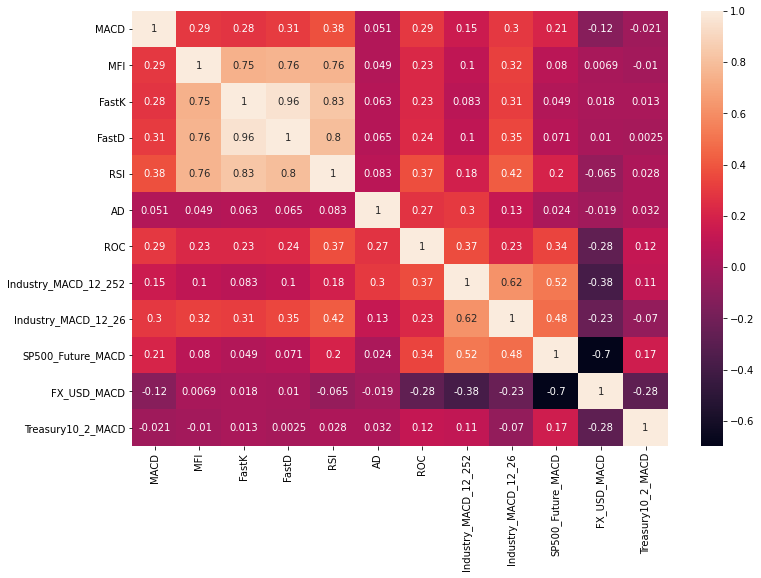

In [20]:
features = ['MACD', 'MFI', 'FastK', 'FastD', 'RSI', 'AD', 'ROC', 
                 'Industry_MACD_12_252', 'Industry_MACD_12_26', 'SP500_Future_MACD', 'FX_USD_MACD', 'Treasury10_2_MACD']
plt.figure(figsize=(12,8))
sns.heatmap(X[features].corr(), annot=True)